Import the required libraries

In [1]:
import cv2
import os
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from skimage.feature import hog

In [2]:
ImagePath = 'Data/DataSet.csv'
ImageNames = pd.read_csv(ImagePath, header=0, index_col=False)
#ImageNames['file'] = ImageNames['file'].apply(lambda x: 'DataSets/files/1/'+x )

In [3]:
print(ImageNames.head())

               file  people
0  Data/1/1_231.png       3
1  Data/1/1_232.png       1
2  Data/1/1_233.png       2
3  Data/1/1_234.png       2
4  Data/1/1_235.png       1


In [4]:
ImageNames['people'].unique()

array([3, 1, 2, 4, 5, 0, 6])

(256, 256)


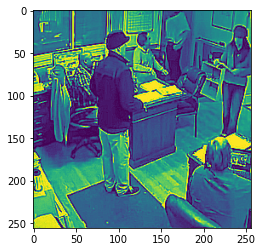

In [5]:
img = cv2.imread(ImageNames.iloc[100].tolist()[0], cv2.IMREAD_GRAYSCALE)
print(img.shape)
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(img_gray)
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img2 = cv2.filter2D(img, -1, kernel)
plt.imshow(img2)

In [6]:
"""
#creating hog features
fd, hog_image1 = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(4, 4), visualize=True, multichannel=True)
#creating hog features
fd, hog_image2 = hog(img2, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(4, 4), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image1, cmap="gray")
#plt.axis("off")
#plt.imshow(hog_image2, cmap="gray")
"""

'\n#creating hog features\nfd, hog_image1 = hog(img, orientations=9, pixels_per_cell=(8, 8),\n                \tcells_per_block=(4, 4), visualize=True, multichannel=True)\n#creating hog features\nfd, hog_image2 = hog(img2, orientations=9, pixels_per_cell=(8, 8),\n                \tcells_per_block=(4, 4), visualize=True, multichannel=True)\nplt.axis("off")\nplt.imshow(hog_image1, cmap="gray")\n#plt.axis("off")\n#plt.imshow(hog_image2, cmap="gray")\n'

In [7]:
"""
plt.axis("off")
plt.imshow(hog_image2, cmap="gray")
"""

'\nplt.axis("off")\nplt.imshow(hog_image2, cmap="gray")\n'

In [8]:
#print(fd.shape)

In [9]:
#print(hog_image1.shape)

In [10]:
#new = hog_image1.flatten()
#print(new.shape)

In [11]:
len(ImageNames['file'].tolist())

340

In [12]:
def loadData():
    imag = []
    y=[]
    imagDir = ImageNames['file'].tolist()
    ab = ImageNames['people'].tolist()
    a = 0
    for i in imagDir:
        try:
            img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
            kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            img2 = cv2.filter2D(img, -1, kernel)
            img1 = cv2.resize(img2, (256, 256))
            #_, hog_image = hog(img1, orientations=9, pixels_per_cell=(8, 8),
            #        cells_per_block=(4, 4), visualize=True, multichannel=True)
            new = img1.flatten() #hog_image.flatten()
            mag = np.array(new, dtype='float32')
            imag.append(mag)
            '''
            if ab[a] != 0:
                y.append(1)
            else:
                y.append(0)
            '''
            y.append(ab[a])
            a +=1 
        except Exception as E:
            print(E,i)
    #print(imag)
    return imag,y
        

In [13]:
X,y = loadData()
#y = ImageNames['people'].tolist()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
print(len(X))

340


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=3)

In [17]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB 
# CaterogircalNB  for categorical input variables
#GaussianNB    for continuous input variables 
#Create a Gaussian NB Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
df=pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df.head()

,Actual,Prediction
0,1,1
1,2,1
2,1,2
3,2,1
4,1,1


In [18]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, recall_score

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
# we will use recall metric to check whether data is balanced
print("Recall:",recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.4852941176470588
Recall: 0.4852941176470588


In [20]:
from sklearn.svm import SVR,SVC
from sklearn.metrics import accuracy_score 

In [21]:
from sklearn.metrics import accuracy_score 
acc=[]
ker=['linear', 'poly', 'rbf', 'sigmoid']
for i in ker:
  #X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3) # testset is 30%
  model = SVC(kernel=i)
  model.fit(X_train, y_train)
  pred_svc = model.predict(X_test)
  accu=accuracy_score(y_test, pred_svc)
  acc.append(accu)
 
print(acc)

[0.6323529411764706, 0.5882352941176471, 0.6176470588235294, 0.6323529411764706]


In [44]:
import numpy as np
acc=[]
ker=['linear', 'poly', 'rbf', 'sigmoid']
for i in ker:
  mc_acc=[]
  for j in range(20):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=j) # testset is 30%
    model = SVC(kernel=i)
    model.fit(X_train, y_train)
    pred_svc = model.predict(X_test)
    accu=accuracy_score(y_test, pred_svc)  # 
    mc_acc.append(accu) # append accuracy score in each MC run

  acc.append(np.mean(mc_acc)) # mean of accuracy and append it in accuracy in kernel array
 
print(acc)

[0.9779411764705882, 0.9779411764705882, 0.9779411764705882, 0.9779411764705882]


In [41]:
best = SVC(kernel='poly')
best.fit(X_train, y_train)
#x_input=X
recom = best.predict(X_test)
print('prediction',recom)
#x_input
print('actual',y_test)

prediction [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [187]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier # decision tee algorithm for classification
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR,SVC
from sklearn.metrics import accuracy_score 


In [188]:
def get_models():
  models = dict()
  models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
  models['Naive_Base']=GaussianNB()
  models['randomforest'] = RandomForestClassifier(n_estimators=60, criterion='entropy')
  return models

In [189]:
import numpy as np
def evaluate_model(model, X, y):
  acc = [] ### Blank vector
  for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)  # split dataset
    dt = model.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
    return np.mean(acc)
    

In [190]:
from numpy import mean, std
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print((name, mean(scores),std(scores)))

('dt_ent', 0.47058823529411764, 0.0)
('Naive_Base', 0.29411764705882354, 0.0)
('randomforest', 0.6764705882352942, 0.0)


In [191]:
clf2 = DecisionTreeClassifier(criterion='entropy')# base learner 1
clf1 = GaussianNB()    # base learner 2
# bagging learner 1
rand1 = RandomForestClassifier(n_estimators=60, criterion='entropy')
bagging1 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
# bagging learner 2
bagging2 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)

In [192]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

label = ['Naive_Base', 'dt_ent', 'random forest']# 'Bagging DT', 'Bagging NB']
clf_list = [clf2, clf1, rand1]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print ("Accuracy:  ",(round(scores.mean(),4), round(scores.std(),3), label))

Accuracy:   (0.5176, 0.112, 'Naive_Base')
Accuracy:   (0.4029, 0.092, 'dt_ent')
Accuracy:   (0.6735, 0.058, 'random forest')


In [28]:
num_est = np.arange(5,50,5)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=10, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean

[nan, nan, nan, nan, nan, nan, nan, nan, nan]

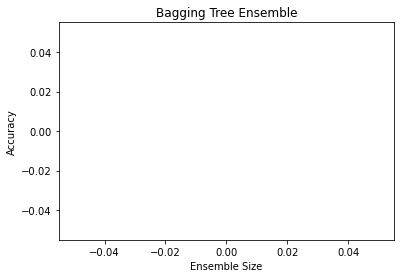

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

In [32]:
from os import listdir
from os.path import isfile, join
mypath = 'DataSets/files/0'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [33]:
#with open ('hello.txt','w+') as f:
#    for i in onlyfiles:
#        f.write(i+'\n')

In [34]:
#with open('hello.txt','r+')as f:
#    a = f.read()
    


In [35]:
#print(type(a))
#b = a.replace(".png", ".jpg")
#print(b)
#with open ('hello.txt','w+') as f:
#    f.write(b)

In [36]:
import cv2
import os
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC

ImagePath1 = 'DataSets/DataSet.csv' #'DataSets/DataSet.csv'
ImageNames1 = pd.read_csv(ImagePath1, header=0, index_col=False)
ImageNames1['file'] = ImageNames1['file'].apply(lambda x: 'DataSets/PNGImages/'+x )

def loadData():
    imag = []
    imagDir = ImageNames1['file'].tolist()
    a = 0
    for i in imagDir:
        img = cv2.imread(i)
        #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        #img2 = cv2.filter2D(img, -1, kernel)
        img1 = cv2.resize(img, (512, 512))
        _, hog_image = hog(img1, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(4, 4), visualize=True, multichannel=True)
        new = hog_image.flatten()
        mag = np.array(new, dtype='float32')
        imag.append(mag)
        a +=1
    #print(imag)
    return imag

In [ ]:
X = loadData()
y = ImageNames1['people'].tolist()

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression

LR = LinearRegression()

#Train the model using the training sets
LR.fit(X_train, y_train)

#Predict the response for test dataset
y_pre = LR.predict(X_test)
y_pred = np.rint(y_pre)
df=pd.DataFrame({'Actual': y_test, 'Prediction': np.rint(y_pred)})
df.head()

,Actual,Prediction
0,1,1.0
1,2,1.0
2,1,1.0
3,2,1.0
4,1,2.0


In [56]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
mse=mean_squared_error(y_pred,y_test) # y_test is the vector of actual values of the target variable in testset
rmse=sqrt(mse)
from statistics import variance
Rsquar=1-mse/variance(y_test)
Rsquar
#model evaluation
#rmse = mean_squared_error(y_test, y_pre)
#r2 = r2_score(y_test, y_pre)
 
# printing values
print('Slope:' ,LR.coef_)
print('Intercept:', LR.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', Rsquar)

Slope: [5.2198902e-06 2.2673485e-06 4.4624576e-06 ... 1.9443542e-06 3.9243632e-06
 7.7285704e-06]
Intercept: 1.3013388
Root mean squared error:  1.0361126443416786
R2 score:  -0.1419565724959142


In [195]:
Acc=[]
for i in range(1):
  #X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) # trainset is 80% ---- testset is 20%
  # create and fit the glm model
  model=LogisticRegression()
  res = model.fit(X_train,y_train)
  #make prediction
  yhat=res.predict(X_test)
  #evaluate the glm 
  acc=accuracy_score(y_test,yhat)
  Acc.append(acc)
print(mean(Acc))
   
## Evaluate predictions

print(  confusion_matrix(y_test, y_pred))

print('accuracy',accuracy_score(y_test, y_pred))

print('precision',precision_score(y_test, y_pred, average='weighted'))
print('recall',recall_score(y_test, y_pred, average='weighted' ))

0.5882352941176471
[[ 0  0  0  0  0  0]
 [ 6 23 17  1  0  0]
 [ 0  7  6  0  0  0]
 [ 1  1  2  2  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  0  0  1]]
accuracy 0.47058823529411764
precision 0.6304554079696395
recall 0.47058823529411764


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [20]:
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_lineal = SVR(kernel='linear')
lr = LinearRegression()
lr1 = LogisticRegression()
svr_poly=SVR(kernel='poly')
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()

In [21]:
from math import sqrt
from statistics import variance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
def launch_model(name,model, X_train, y_train, X_test, y_test):
    #Acc=[]
    #for i in range(10):
    #X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print ('RMSE test', sqrt(mean_squared_error(y_test, np.int_(y_pred))))
    mse=mean_squared_error(y_pred,y_test) # y_test is the vector of actual values of the target variable in testset
    #rmse=sqrt(mse)
    Rsquar=1-mse/variance(y_test)
    print('R Squre ',Rsquar)
    print("Mean absolute error: ",mean_absolute_error(y_test, np.int_(y_pred)))


In [23]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - linear')
print ('-----------')
results.append(launch_model('SVR - linear', svr_lineal, X_train, y_train, X_test, y_test))
print ('-----------')
print (' linear Regresion')
print ('-----------')
results.append(launch_model('logistic Regression', lr1, X_train, y_train, X_test, y_test))
print ('-----------')
print (' logistic Regresion')
print ('-----------')
results.append(launch_model('Regresion linear', lr, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR poly')
print ('-----------')
results.append(launch_model('SVR - polyz', svr_poly, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Decission Tree')
print ('-----------')
results.append(launch_model('SVR - polyz', DT, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Random forest')
print ('-----------')
results.append(launch_model('SVR - polyz', RF, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
RMSE test 1.0914103126634984
R Squre  -0.0032602785912592136
Mean absolute error:  0.5735294117647058
-----------
SVR - linear
-----------
RMSE test 1.0846522890932808
R Squre  0.10120793207162848
Mean absolute error:  0.6176470588235294
-----------
 linear Regresion
-----------
RMSE test 1.0571882797418488
R Squre  -0.18888629465328055
Mean absolute error:  0.5294117647058824
-----------
 logistic Regresion
-----------
RMSE test 1.1048023512348795
R Squre  0.08029290091752628
Mean absolute error:  0.6323529411764706
-----------
SVR poly
-----------
RMSE test 1.118033988749895
R Squre  0.0847107544001422
Mean absolute error:  0.6617647058823529
-----------
Decission Tree
-----------
RMSE test 1.289094529459478
R Squre  -0.7676862012607988
Mean absolute error:  0.7794117647058824
-----------
Random forest
-----------
RMSE test 1.1440382552221602
R Squre  -0.1282437076815317
Mean absolute error:  0.6617647058823529


In [142]:
new = np.array(X[100], dtype='float32')
print(new)
"""
svr_rbf.fit(X_train, y_train,)
y_pred = svr_rbf.predict()
print(y_pred)
print(y[100])
"""

[164.  78.  87. ...  38.   5.   0.]


'\nsvr_rbf.fit(X_train, y_train,)\ny_pred = svr_rbf.predict()\nprint(y_pred)\nprint(y[100])\n'

In [143]:
lr.fit(X_train, y_train)
#x_input=X
recom = lr.predict(X_test)
print('prediction',np.int_(recom))
#x_input
print('actual',y_test)

prediction [1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]
actual [1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 2, 4, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 4, 1, 1, 1, 0, 1, 1, 1, 3, 2, 6, 1, 1, 1]
